### Step 1: Import Packages

In [28]:
import numpy as np
import os
import sys
import time
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)
logfile_path = os.path.join(log_dir, 'auditing-SGD.log')

# Add the src directory to sys.path
sys.path.append(src_dir)

from analysis.tradeoff_toyDPSGD import toyDPSGD_compute_tradeoff_curve
from analysis.accuracy_analysis import create_plot, baybox_acc_bound
from functools import partial

from mech.toy_DPSGD import *

### Step 2: Instantiate the $f$-DP Auditor for DP-SGD Mechanism

In [34]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(message)s",
    handlers=[
        logging.FileHandler(logfile_path)
        # logging.StreamHandler()
    ]
)

kwargs1 = {"sgd_alg":{
            "theta_0": np.float64(0), 
            "T": 5,
            "m":5,
            "eta":0.2,
            "sigma":0.2
        }
    }
claimed_f = partial(toyDPSGD_compute_tradeoff_curve,kwargs=kwargs1)


num_train_samples=10**5
kwargs = generate_params(num_train_samples, num_test_samples=10**3)
kwargs["claimed_f"] = claimed_f

auditor = toy_DPSGDPAuditor(kwargs)

### Step 3: Auditing and Report

In [35]:
output = auditor.build()

In [36]:
output["Report"] 

'No Violation'

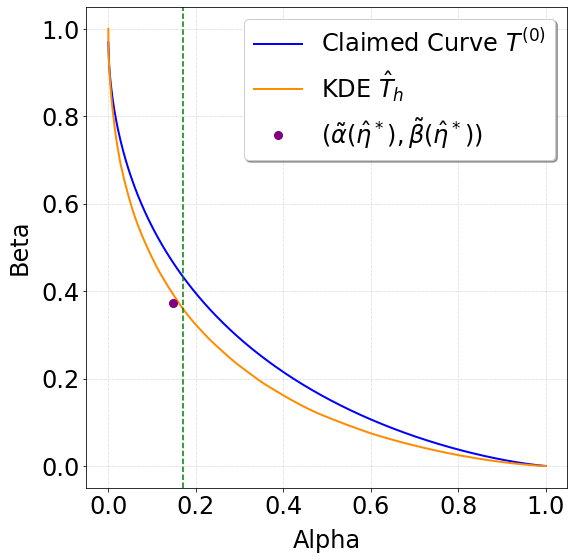

In [37]:
omega=baybox_acc_bound(num_train_samples, kwargs["gamma"])
file_name = os.path.join(fig_dir, 'new_auditing_faulty_sgd_105.png')


create_plot(omega, output["estimated_alpha"], output["estimated_beta"], np.linspace(0,1,500), output["scan_alpha"], output["scan_beta"], output["critical_alpha"], output["critical_beta"], file_name, claimed_f)